In [2]:
# Import necessary libraries for data manipulation, visualization, and analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
import os

warnings.filterwarnings('ignore')

Data = pd.read_csv('./data/apple_quality.csv')

Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [3]:
# Check for missing values in each column
Data.isnull().sum()
# Check for duplicate rows in the dataset
Data.duplicated().sum()
# Drop duplicate rows if any exist
Data.dropna(inplace = True)
# Verify that there are no remaining missing values after cleaning
Data.isnull().sum()
# Convert the 'Acidity' column to float type for consistency
Data['Acidity'] = Data['Acidity'].astype(float)
# Map the 'Quality' column values to binary: 'good' to 1 and 'bad' to 0
Data['Quality'] = Data['Quality'].map({'good':1, 'bad':0})
# Drop the column 'A_id' as it may not be relevant for analysis
Data.drop(columns=['A_id'], inplace=True)
# Display dataset information again to confirm the changes made to columns
Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   float64
 7   Quality      4000 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 281.2 KB


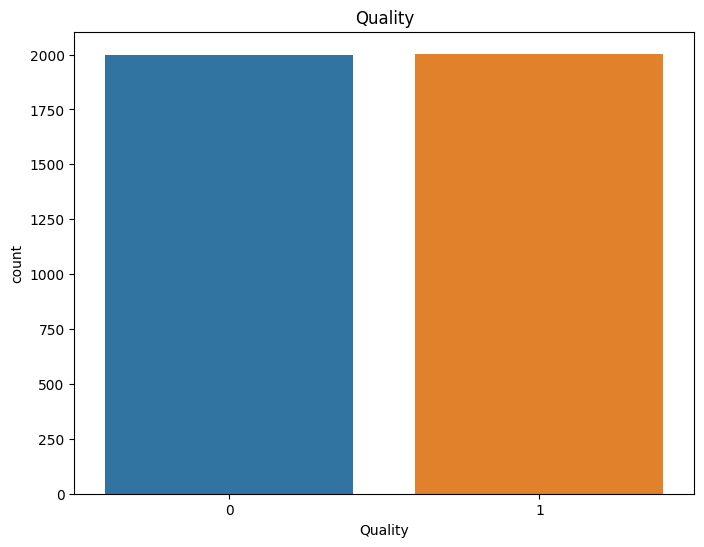

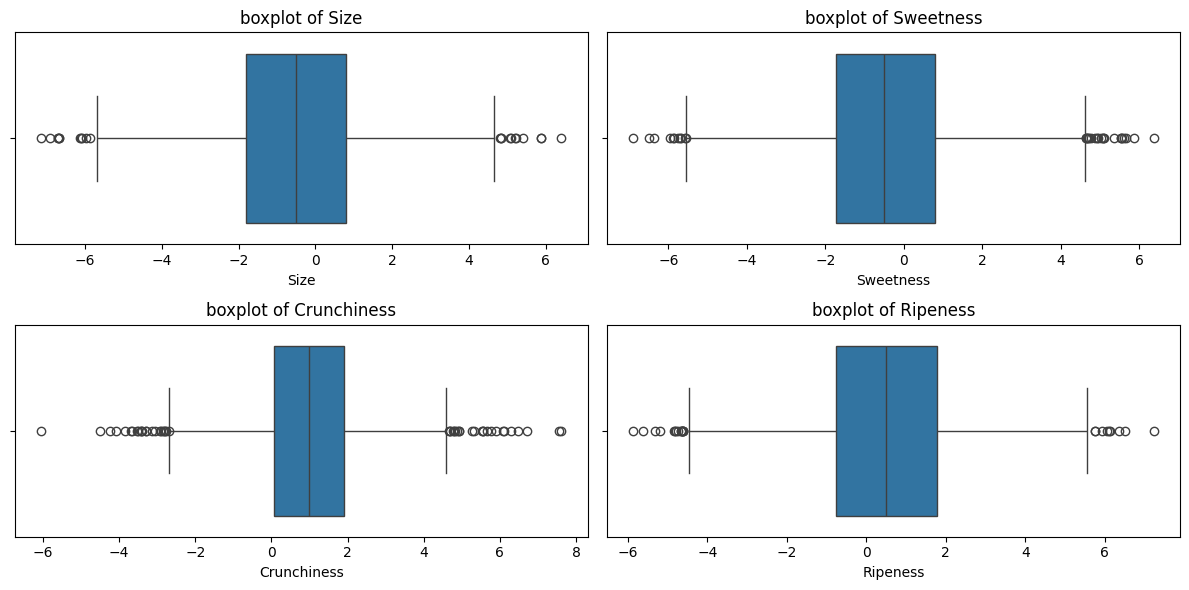

Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness   Acidity
0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840 -0.491590
1 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530 -0.722809
2 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033  2.621636
3 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761  0.790723
4  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849  0.501984

In [4]:
# Plot a countplot to visualize the distribution of the 'Quality' variable
plt.figure(figsize=(8,6))
sns.countplot(data=Data, x='Quality', palette=['#1f77b4', '#ff7f0e'])  # 设置两个不同的颜色
plt.title('Quality')
plt.show()

# Set up a figure with multiple subplots for histograms of different features
plt.figure(figsize=(12, 6))

# Plot histograms for 'Size', 'Sweetness', 'Crunchiness', and 'Ripeness' to observe their distributions
plt.subplot(2, 2, 1)
sns.boxplot(x=Data['Size'])
plt.title('boxplot of Size')

plt.subplot(2, 2, 2)
sns.boxplot(x=Data['Sweetness'])
plt.title('boxplot of Sweetness')

plt.subplot(2, 2, 3)
sns.boxplot(x=Data['Crunchiness'])
plt.title('boxplot of Crunchiness')

plt.subplot(2, 2, 4)
sns.boxplot(x=Data['Ripeness'])
plt.title('boxplot of Ripeness')

plt.tight_layout()
plt.show()

# Define bounds for outliers using the interquartile range (IQR) method
filter_data=Data.iloc[:,[0,1,2,3,4,5,6]]
filter_data.head()

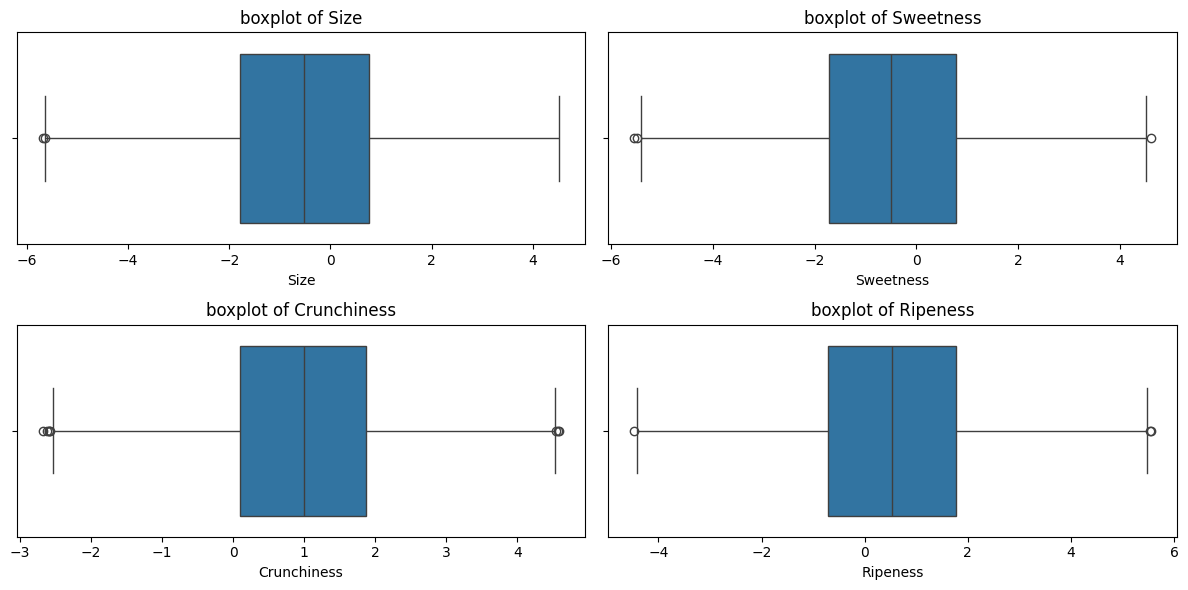

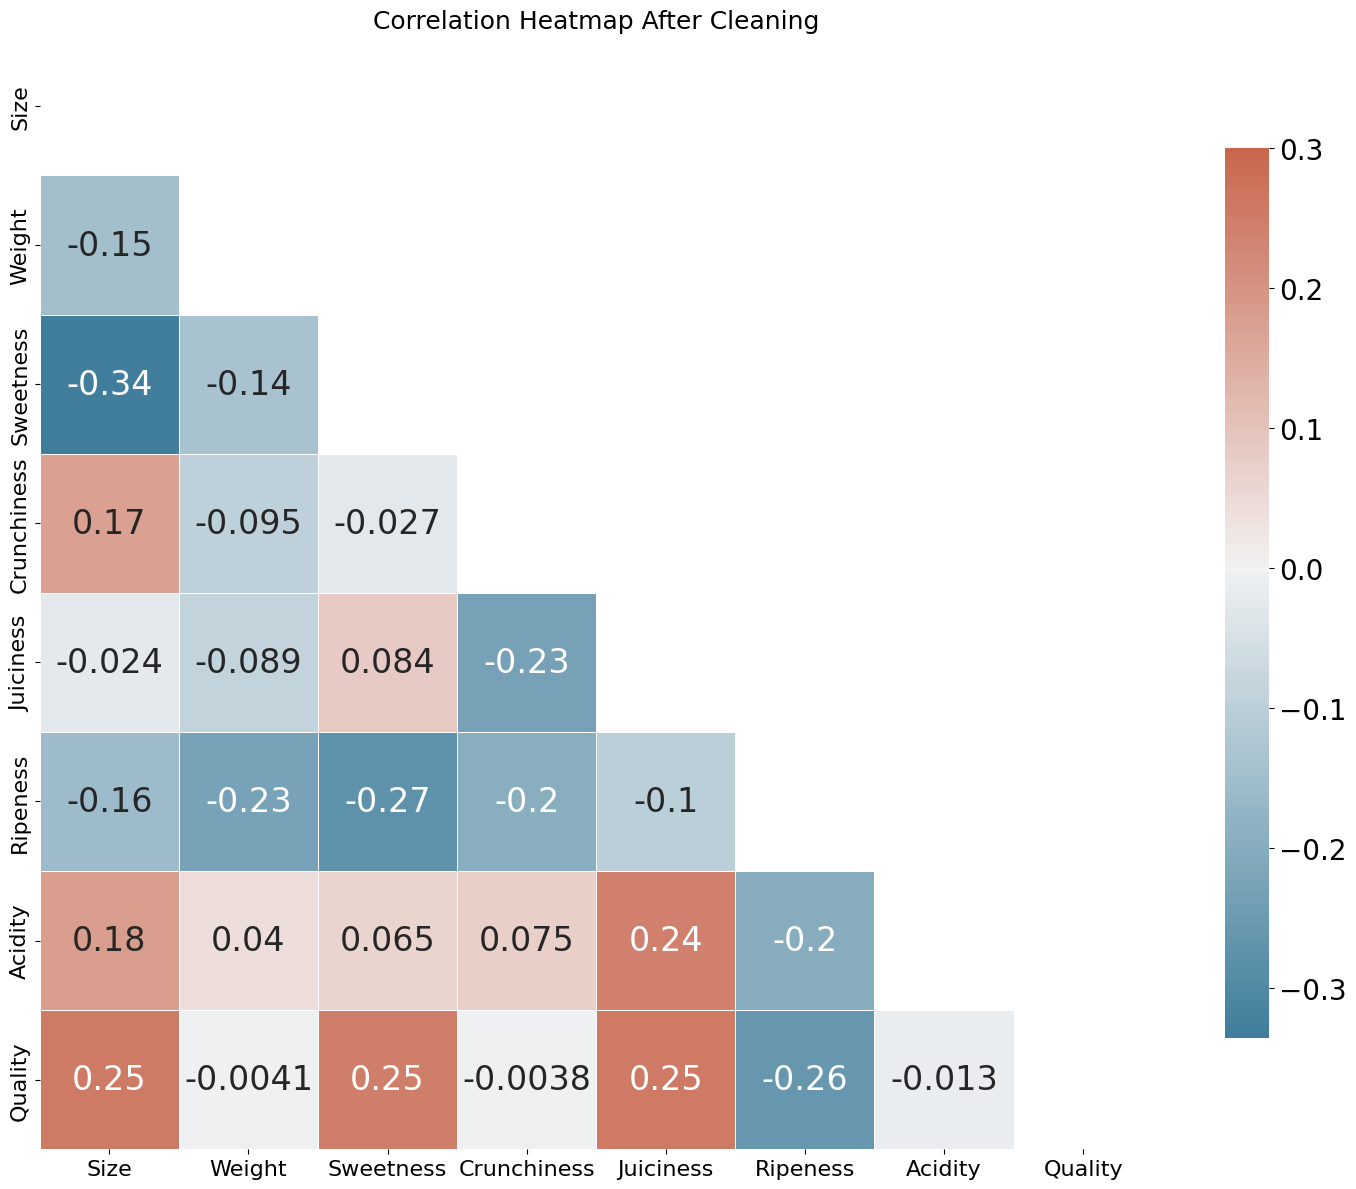

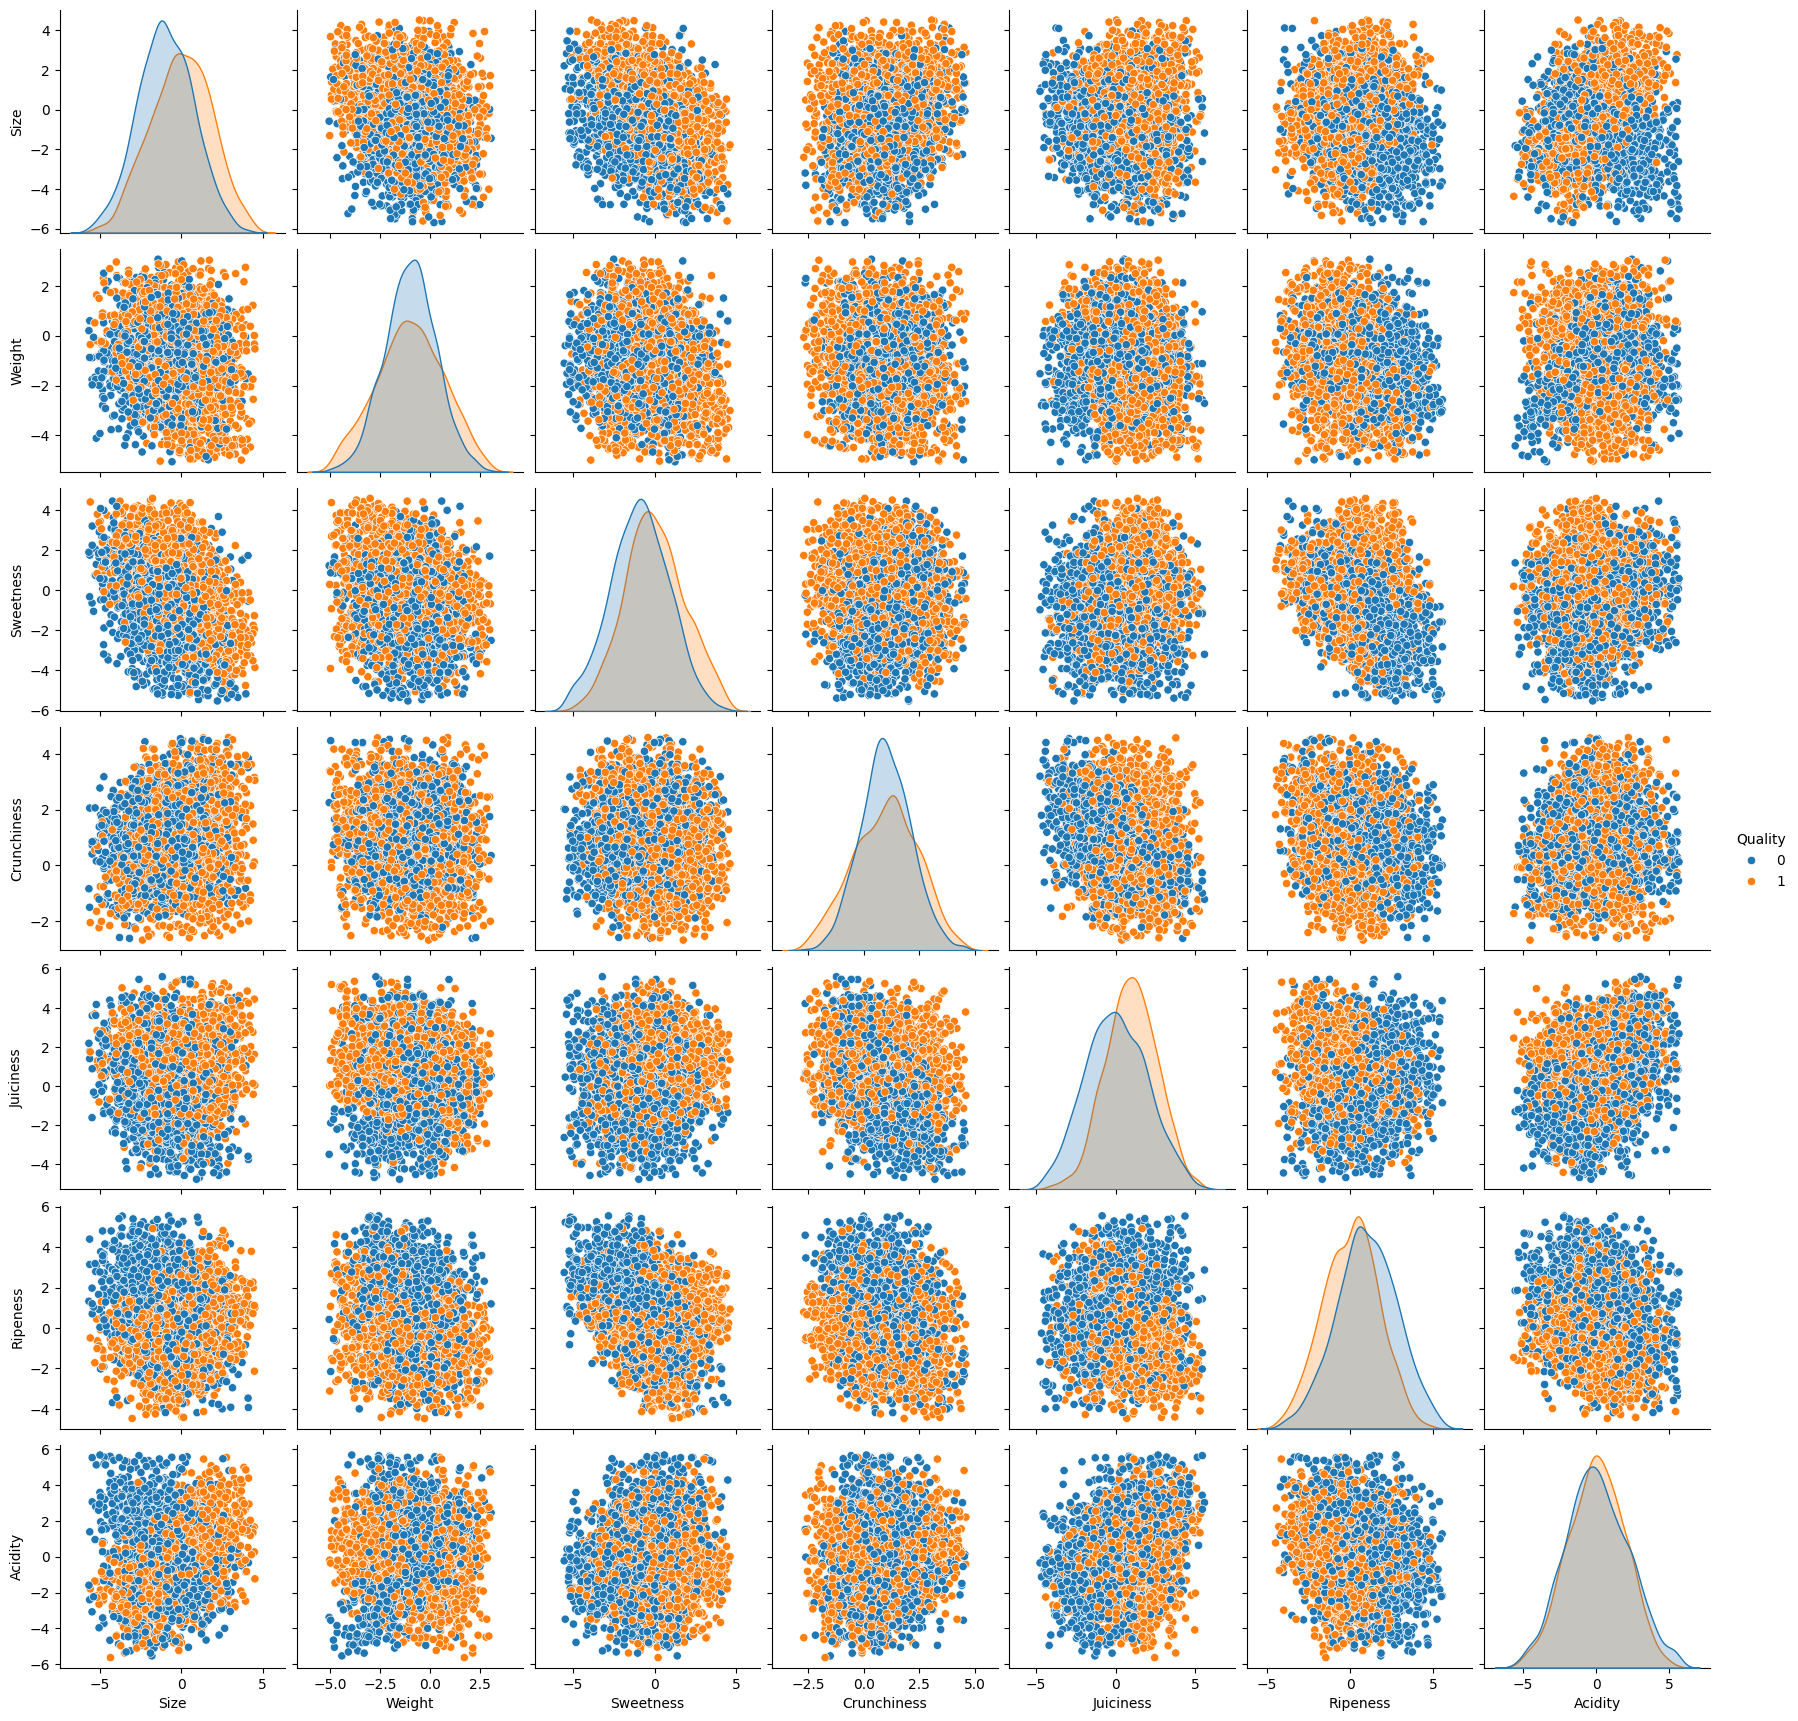

In [23]:
# Identify and remove outliers from the dataset
for column in filter_data.columns:
    Q1 = filter_data[column].quantile(0.25)
    Q3 = filter_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    Data[column] = filter_data[(filter_data[column] >= lower_bound) & (filter_data[column] <= upper_bound)][column]

# Plot histograms for each feature again after removing outliers to observe the changes in distributions
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.boxplot(x=Data['Size'])
plt.title('boxplot of Size')

plt.subplot(2, 2, 2)
sns.boxplot(x=Data['Sweetness'])
plt.title('boxplot of Sweetness')

plt.subplot(2, 2, 3)
sns.boxplot(x=Data['Crunchiness'])
plt.title('boxplot of Crunchiness')

plt.subplot(2, 2, 4)
sns.boxplot(x=Data['Ripeness'])
plt.title('boxplot of Ripeness')

plt.tight_layout()
plt.show()

# Drop any remaining missing values in the dataset
Data.dropna(inplace= True)

# Display the heatmap to re-evaluate correlations after cleaning and outlier removal
corr = Data.corr()  # Calculate correlations
mask = np.triu(np.ones_like(corr, dtype=bool))  # Upper triangle mask
cmap = sns.diverging_palette(230, 20, as_cmap=True)  # Diverging color palette

# Plot the heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    vmax=.3,
    center=0,
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .8},  # Adjust color bar size
    annot=True,
    annot_kws={"size": 24}  # Set annotation font size
)

# Customize axis font sizes
plt.xticks(fontsize=16)  # Increase x-axis label font size
plt.yticks(fontsize=16)  # Increase y-axis label font size
plt.title("Correlation Heatmap After Cleaning", fontsize=18)  # Add a title

# Increase the color bar tick labels' font size
cbar = plt.gca().collections[0].colorbar
cbar.ax.tick_params(labelsize=20)  # Set color bar tick font size

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

# Create pair plots to visualize relationships between all pairs of features with 'Quality' as hue
sns.pairplot(Data, hue='Quality')
plt.show()

# Drop the 'Quality' column as it will be used as the target variable
X = Data.drop("Quality", axis = 1)
y = Data["Quality"]
# Displaying the first 5 rows of the target variable (y)
y.head()

# Splitting the dataset into training and testing sets
# 70% of the data will be used for training and 30% for testing
# random_state=0 ensures reproducibility of the split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [6]:
y.head()

1    1
2    0
3    1
4    1
5    0
Name: Quality, dtype: int64

In [7]:
X.head()

Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness   Acidity
1 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530 -0.722809
2 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033  2.621636
3 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761  0.790723
4  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849  0.501984
5 -3.425400 -1.409082  -1.913511    -0.555775  -3.853071  1.914616 -2.981523

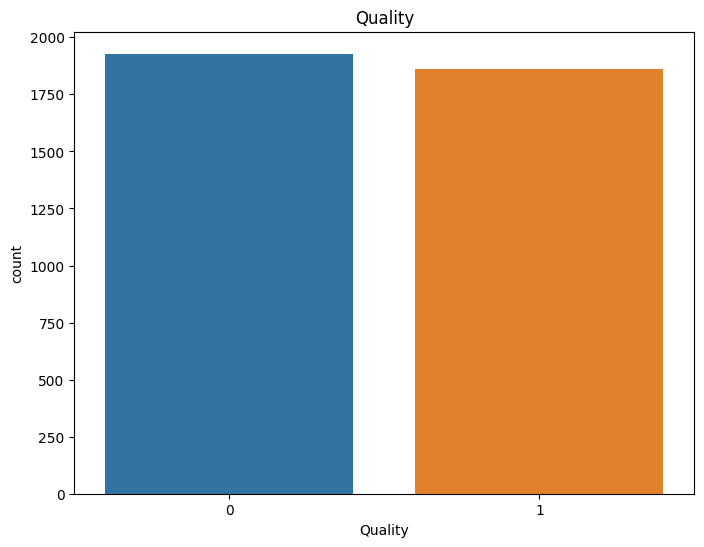

In [8]:
# Plot a countplot to visualize the distribution of the 'Quality' variable
plt.figure(figsize=(8,6))
sns.countplot(data=Data, x='Quality', palette=['#1f77b4', '#ff7f0e'])  # 设置两个不同的颜色
plt.title('Quality')
plt.show()

In [9]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import roc_auc_score, f1_score, classification_report, make_scorer
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
import pandas as pd

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(random_state=0),
    "KNN": KNeighborsClassifier(n_neighbors=8),
    "Decision Tree": DecisionTreeClassifier(max_depth=12),
    "AdaBoost": AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=12), n_estimators=75, learning_rate=0.75, random_state=42),
    "SVC": SVC(probability=True),
    "Naive Bayes": GaussianNB(),
    "XGBoost": xgb.XGBClassifier(),
    "Bagging Classifier": BaggingClassifier(),
    "Ridge Classifier": RidgeClassifier(),
    "MLP Classifier": MLPClassifier(hidden_layer_sizes=(100, 50), learning_rate_init=0.075, random_state=42)
}

# Placeholder for results
results = []

# Standardize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform 5-fold cross-validation for each model
for name, model in models.items():
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    auc_scores = []
    f1_scores = []

    
    for train_idx, test_idx in skf.split(X, y):
        X_train_fold, X_test_fold = X.iloc[train_idx], X.iloc[test_idx]
        y_train_fold, y_test_fold = y.iloc[train_idx], y.iloc[test_idx]
        
        # Standardize within each fold
        X_train_fold = scaler.fit_transform(X_train_fold)
        X_test_fold = scaler.transform(X_test_fold)
        
        model.fit(X_train_fold, y_train_fold)
        y_pred_proba = model.predict_proba(X_test_fold)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test_fold)
        y_pred = model.predict(X_test_fold)
        
        # Calculate AUC and F1
        auc_scores.append(roc_auc_score(y_test_fold, y_pred_proba))
        f1_scores.append(f1_score(y_test_fold, y_pred))

    
    # Store mean scores for this model
    results.append({
        "Model": name,
        "Mean F1": sum(f1_scores)*100 / len(f1_scores),
        "Mean AUC": sum(auc_scores)*100 / len(auc_scores)
        
    })

# Convert results to a DataFrame and display
results_df = pd.DataFrame(results).sort_values(by="Mean F1", ascending=False)

print(results_df)

                  Model    Mean F1   Mean AUC
10       MLP Classifier  93.120686  97.712987
4              AdaBoost  89.366410  96.069287
5                   SVC  88.800945  95.770806
2                   KNN  88.742671  95.711829
7               XGBoost  88.345451  95.568586
1         Random Forest  88.221564  95.227282
8    Bagging Classifier  84.747357  92.999775
3         Decision Tree  79.455296  81.979990
6           Naive Bayes  74.478474  82.630425
9      Ridge Classifier  74.416071  82.035982
0   Logistic Regression  73.965696  82.024422


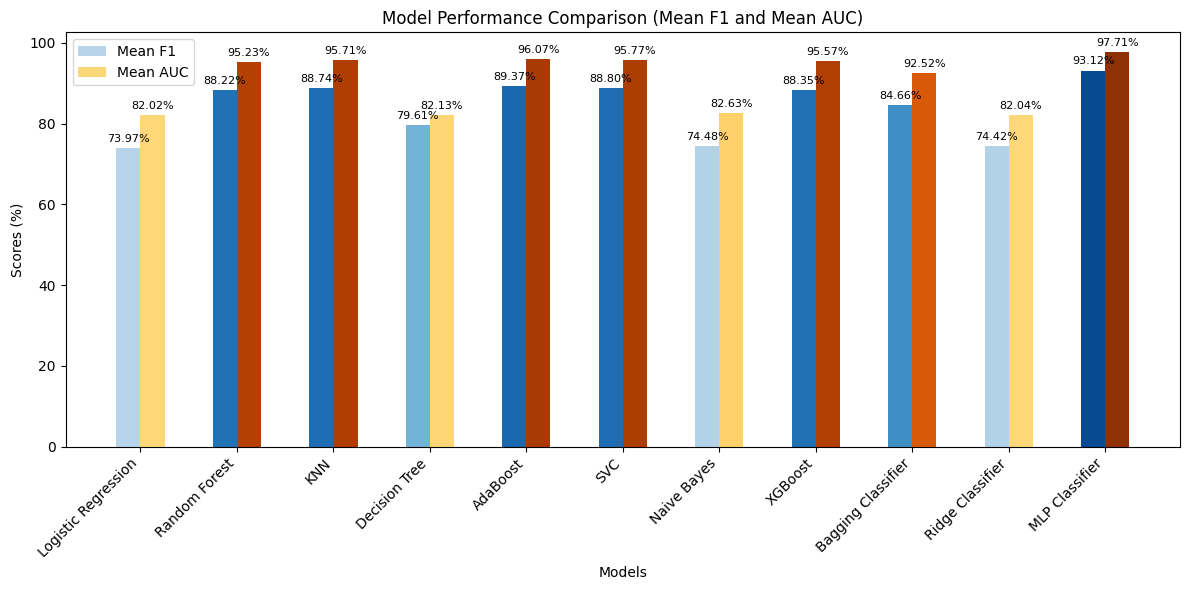

In [9]:
# Extract data for plotting
models = [item["Model"] for item in results]
mean_f1 = [item["Mean F1"] for item in results]
mean_auc = [item["Mean AUC"] for item in results]

# Create a bar chart
x = np.arange(len(models))  # X positions for the groups
width = 0.25  # Reduce the width of bars for thinner appearance

fig, ax = plt.subplots(figsize=(12, 6))

# Define color gradients with limited range for better visibility
base_blue = plt.cm.Blues
base_yellow = plt.cm.YlOrBr

# Normalize values to a custom range [0.3, 0.9] for better contrast
def normalize_custom(values, min_val=0.3, max_val=0.9):
    norm = (values - np.min(values)) / (np.max(values) - np.min(values))
    return min_val + norm * (max_val - min_val)

f1_norm = normalize_custom(mean_f1)
auc_norm = normalize_custom(mean_auc)

# Map normalized values to colors
f1_colors = base_blue(f1_norm)
auc_colors = base_yellow(auc_norm)

# Bar plots for Mean F1 and Mean AUC with color gradients
bars1 = ax.bar(x - width / 2, mean_f1, width, label="Mean F1", color=f1_colors)
bars2 = ax.bar(x + width / 2, mean_auc, width, label="Mean AUC", color=auc_colors)

# Add labels and title
ax.set_xlabel("Models")
ax.set_ylabel("Scores (%)")
ax.set_title("Model Performance Comparison (Mean F1 and Mean AUC)")
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha="right")
ax.legend()

# Annotate the bars with their values (smaller font size)
for bars, values in [(bars1, mean_f1), (bars2, mean_auc)]:
    for bar, value in zip(bars, values):
        height = bar.get_height()
        ax.annotate(f"{value:.2f}%",
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # Offset text above the bar
                    textcoords="offset points",
                    ha="center", va="bottom",
                    fontsize=8)  # Set fontsize smaller

plt.tight_layout()
plt.show()

In [10]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
import time
from IPython.display import display, Audio
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Data preparation
scaler = StandardScaler()
X_train_np = scaler.fit_transform(X_train)  # Using NumPy arrays directly
X_test_np = scaler.transform(X_test)       # Using NumPy arrays directly

# Convert to PyTorch Tensor
X_train = torch.tensor(X_train_np, dtype=torch.float32)
X_test = torch.tensor(X_test_np, dtype=torch.float32)
y_train = torch.tensor(y_train.to_numpy(), dtype=torch.float32).view(-1, 1)
y_test = torch.tensor(y_test.to_numpy(), dtype=torch.float32).view(-1, 1)

# Create a dataset and data loader
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Define the neural network model
class NeuralNetwork(nn.Module):
    def __init__(self, input_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.bn1 = nn.BatchNorm1d(128)
        self.fc2 = nn.Linear(128, 64)
        self.bn2 = nn.BatchNorm1d(64)
        self.fc3 = nn.Linear(64, 32)
        self.bn3 = nn.BatchNorm1d(32)
        self.output = nn.Linear(32, 1)
        
    def forward(self, x):
        x = F.leaky_relu(self.bn1(self.fc1(x)), negative_slope=0.01)
        x = F.leaky_relu(self.bn2(self.fc2(x)), negative_slope=0.01)
        x = F.leaky_relu(self.bn3(self.fc3(x)), negative_slope=0.01)
        x = torch.sigmoid(self.output(x))
        return x




def play_simple_beep():
    # Generate a 1-second, 440Hz tone
    framerate = 44100
    duration = 1
    t = np.linspace(0, duration, int(framerate * duration))
    sound = np.sin(2 * np.pi * 440 * t)  # 440Hz is the standard pitch (A4)
    display(Audio(sound, rate=framerate, autoplay=True))

Early stopping triggered


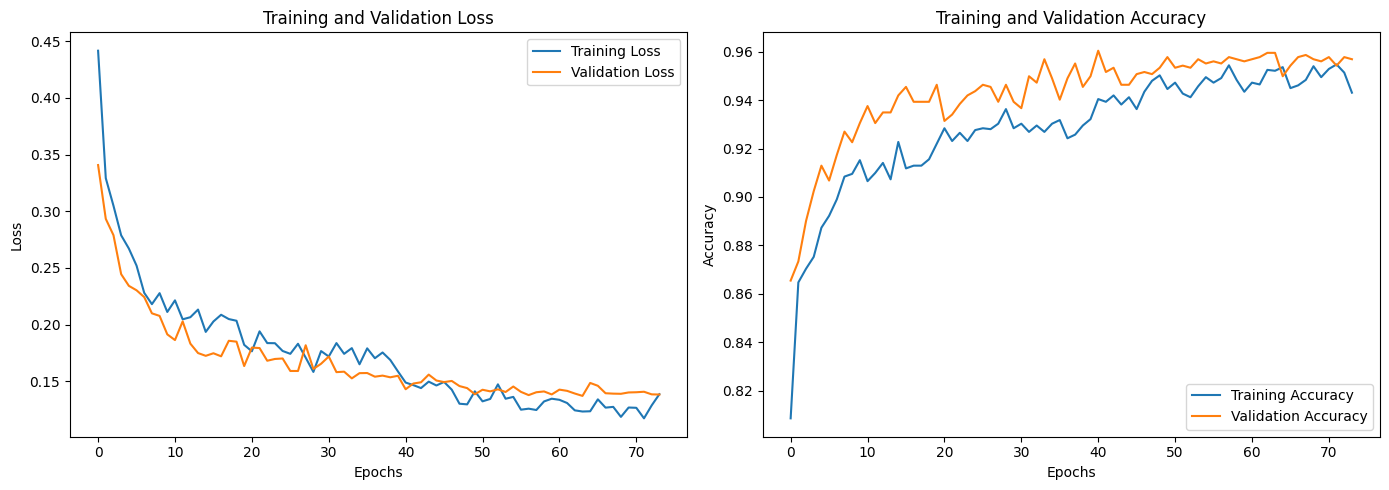

Test Accuracy: 0.95690
Test F1 Score: 0.95706
Test AUC Score: 0.98710


Total execution time: 25.25 seconds


In [13]:
from torch.optim.lr_scheduler import ReduceLROnPlateau
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score


start_time = time.time()

# Initialize the model, loss function, and optimizer
model = NeuralNetwork(input_size=X_train.shape[1])
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss for binary classification
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.001)  # L2 regularization (weight_decay)

# Initialize learning rate scheduler
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5, verbose=True)  # Reduce LR by half if no improvement in 5 epochs

# Training with early stopping
epochs = 500
patience = 10
best_val_loss = np.inf  # Initialize to infinity so that any loss will be lower
early_stopping_counter = 0

# Lists to store metrics for plotting
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    correct_train = 0
    total_train = 0

    # Training loop
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

        # Calculate training accuracy
        predicted_train = (y_pred > 0.5).float()
        correct_train += (predicted_train == y_batch).sum().item()
        total_train += y_batch.size(0)
    
    # Calculate average training loss and accuracy for the epoch
    epoch_loss /= len(train_loader)
    train_accuracy = correct_train / total_train
    train_losses.append(epoch_loss)
    train_accuracies.append(train_accuracy)
    

    # Validation step for early stopping
    model.eval()
    with torch.no_grad():
        val_pred = model(X_test)
        val_loss = criterion(val_pred, y_test)
        val_losses.append(val_loss.item())
        
        # Calculate validation accuracy
        predicted_val = (val_pred > 0.5).float()
        val_accuracy = accuracy_score(y_test, predicted_val)
        val_accuracies.append(val_accuracy)
        
        # Adjust learning rate based on validation loss
        scheduler.step(val_loss)

        # Check if this is the lowest validation loss so far
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            early_stopping_counter = 0  # Reset counter
            best_model_state = model.state_dict()  # Save the best model state
        else:
            early_stopping_counter += 1
        
        # Trigger early stopping if the counter reaches the patience level
        if early_stopping_counter >= patience:
            print("Early stopping triggered")
            break

# Load the best model state with the lowest validation loss
model.load_state_dict(best_model_state)

# Plotting training and validation loss
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label="Training Accuracy")
plt.plot(val_accuracies, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    y_test_pred = model(X_test)
    y_test_pred_class = (y_test_pred > 0.5).float()  # Convert probabilities to binary class (0 or 1)
    accuracy = accuracy_score(y_test, y_test_pred_class)
    print(f"Test Accuracy: {accuracy:.5f}")
    # Calculate F1-score
    f1 = f1_score(y_test, y_test_pred_class)
    print(f"Test F1 Score: {f1:.5f}")
    # Calculate AUC score
    y_test_pred_proba = y_test_pred.numpy()  # Predicted probabilities
    auc = roc_auc_score(y_test.numpy(), y_test_pred_proba)
    print(f"Test AUC Score: {auc:.5f}")

# Play beep sound
play_simple_beep()
    
# Record end time and calculate total duration
end_time = time.time()
elapsed_time = end_time - start_time
    
# Print execution time
print(f"Total execution time: {elapsed_time:.2f} seconds")


In [1]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import roc_auc_score, f1_score, classification_report, make_scorer
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
import pandas as pd

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(random_state=0),
    "KNN": KNeighborsClassifier(n_neighbors=8),
    "Decision Tree": DecisionTreeClassifier(max_depth=12),
    "AdaBoost": AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=12), n_estimators=75, learning_rate=0.75, random_state=42),
    "SVC": SVC(probability=True),
    "Naive Bayes": GaussianNB(),
    "XGBoost": xgb.XGBClassifier(),
    "Bagging Classifier": BaggingClassifier(),
    "Ridge Classifier": RidgeClassifier(),
    "MLP Classifier": MLPClassifier(hidden_layer_sizes=(100, 50), learning_rate_init=0.075, random_state=42)
}

# Placeholder for results
results = []

# Standardize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform 5-fold cross-validation for each model
for name, model in models.items():
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    auc_scores = []
    f1_scores = []

    
    for train_idx, test_idx in skf.split(X, y):
        X_train_fold, X_test_fold = X.iloc[train_idx], X.iloc[test_idx]
        y_train_fold, y_test_fold = y.iloc[train_idx], y.iloc[test_idx]
        
        # Standardize within each fold
        X_train_fold = scaler.fit_transform(X_train_fold)
        X_test_fold = scaler.transform(X_test_fold)
        
        model.fit(X_train_fold, y_train_fold)
        y_pred_proba = model.predict_proba(X_test_fold)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test_fold)
        y_pred = model.predict(X_test_fold)
        
        # Calculate AUC and F1
        auc_scores.append(roc_auc_score(y_test_fold, y_pred_proba))
        f1_scores.append(f1_score(y_test_fold, y_pred))

    
    # Store mean scores for this model
    results.append({
        "Model": name,
        "Mean F1": sum(f1_scores)*100 / len(f1_scores),
        "Mean AUC": sum(auc_scores)*100 / len(auc_scores)
        
    })

# Convert results to a DataFrame and display
results_df = pd.DataFrame(results).sort_values(by="Mean F1", ascending=False)

print(results_df)

NameError: name 'X_train' is not defined

In [10]:
# Store mean scores for this model
results.append({
"Model": "AQNet",
"Mean F1": 0.95706*100,
"Mean AUC": 0.98710*100        
})


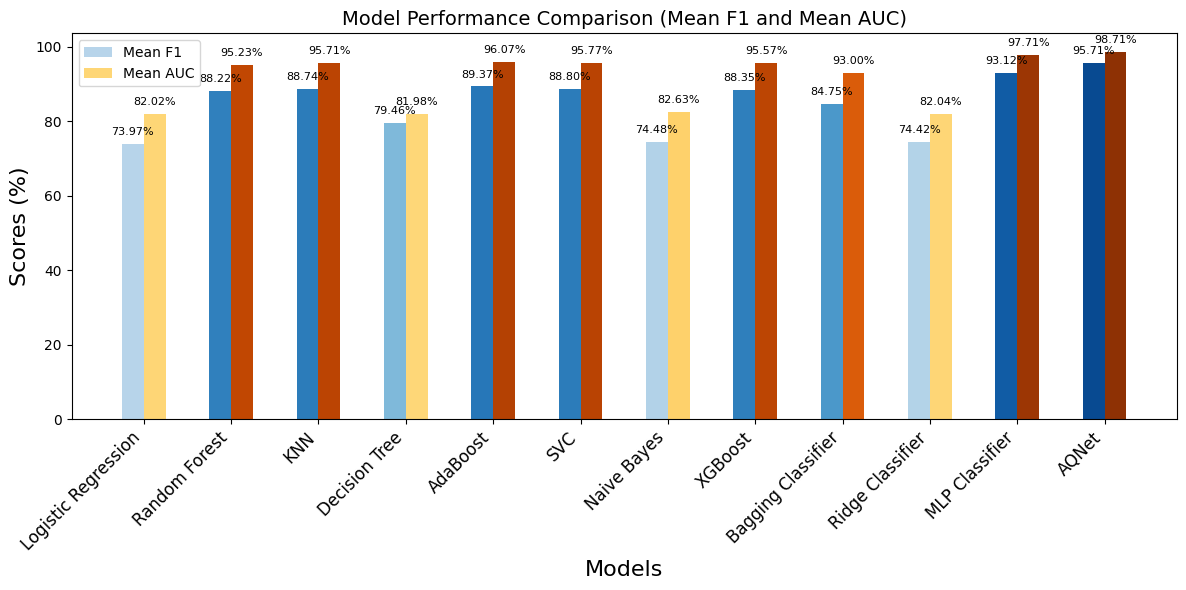

In [11]:
# Extract data for plotting
models = [item["Model"] for item in results]
mean_f1 = [item["Mean F1"] for item in results]
mean_auc = [item["Mean AUC"] for item in results]

# Create a bar chart
x = np.arange(len(models))  # X positions for the groups
width = 0.25  # Reduce the width of bars for a thinner appearance

fig, ax = plt.subplots(figsize=(12, 6))

# Define color gradients with limited range for better visibility
base_blue = plt.cm.Blues
base_yellow = plt.cm.YlOrBr

# Normalize values to a custom range [0.3, 0.9] for better contrast
def normalize_custom(values, min_val=0.3, max_val=0.9):
    norm = (values - np.min(values)) / (np.max(values) - np.min(values))
    return min_val + norm * (max_val - min_val)

f1_norm = normalize_custom(mean_f1)
auc_norm = normalize_custom(mean_auc)

# Map normalized values to colors
f1_colors = base_blue(f1_norm)
auc_colors = base_yellow(auc_norm)

# Bar plots for Mean F1 and Mean AUC with color gradients
bars1 = ax.bar(x - width / 2, mean_f1, width, label="Mean F1", color=f1_colors)
bars2 = ax.bar(x + width / 2, mean_auc, width, label="Mean AUC", color=auc_colors)

# Add labels and title
ax.set_xlabel("Models", fontsize=16)  # Set font size for x-axis label
ax.set_ylabel("Scores (%)", fontsize=16)  # Set font size for y-axis label
ax.set_title("Model Performance Comparison (Mean F1 and Mean AUC)", fontsize=14)  # Set font size for title
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha="right", fontsize=12)  # Set font size for x-axis tick labels
ax.legend(fontsize=10)  # Set font size for legend

# Annotate the bars with their values
for bars, values in [(bars1, mean_f1), (bars2, mean_auc)]:
    for bar, value in zip(bars, values):
        height = bar.get_height()
        ax.annotate(f"{value:.2f}%",
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),  # Offset text above the bar
                    textcoords="offset points",
                    ha="center", va="bottom",
                    fontsize=8)  # Set font size for annotations

plt.tight_layout()
plt.show()


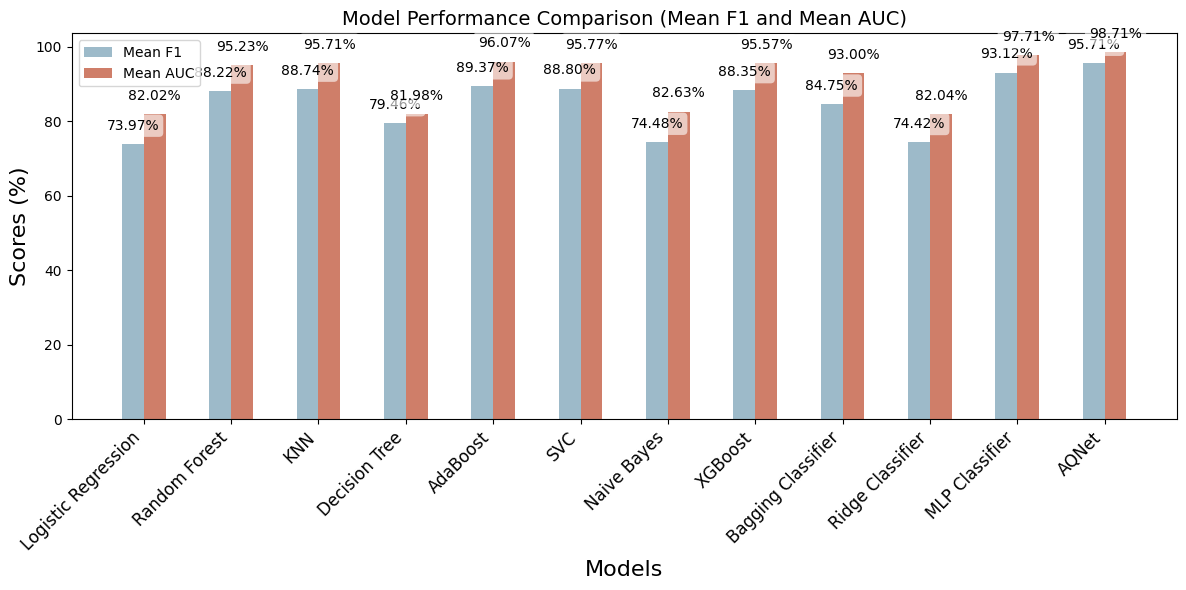

In [13]:
# Update bar colors to specified shades
fig, ax = plt.subplots(figsize=(12, 6))

# Bar plots for Mean F1 and Mean AUC with specified colors
bars1 = ax.bar(x - width / 2, mean_f1, width, label="Mean F1", color='#9DBAC9')  # Soft teal
bars2 = ax.bar(x + width / 2, mean_auc, width, label="Mean AUC", color='#CF7E69')  # Warm coral

# Add labels and title
ax.set_xlabel("Models", fontsize=16)  # Set font size for x-axis label
ax.set_ylabel("Scores (%)", fontsize=16)  # Set font size for y-axis label
ax.set_title("Model Performance Comparison (Mean F1 and Mean AUC)", fontsize=14)  # Set font size for title
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha="right", fontsize=12)  # Set font size for x-axis tick labels
ax.legend(fontsize=10)  # Set font size for legend

# Annotate the bars with their values
for bars, values in [(bars1, mean_f1), (bars2, mean_auc)]:
    for bar, value in zip(bars, values):
        height = bar.get_height()
        ax.annotate(f"{value:.2f}%", 
                    xy=(bar.get_x() + bar.get_width() / 2, height), 
                    xytext=(0, 8),  # Slightly increase offset to avoid crowding
                    textcoords="offset points",
                    ha="center", va="bottom",
                    fontsize=10,  # Slightly larger font size for emphasis
                    bbox=dict(boxstyle="round,pad=0.3", edgecolor='none', facecolor='white', alpha=0.6))  # Add background

plt.tight_layout()
plt.show()
